In [100]:
import numpy as np
import matplotlib.pyplot as plt

Definimos algunas funciones que luego usaremos

In [101]:
# antes creamos algunos números x
x = np.linspace(-10, 10, 100)
x

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

<function matplotlib.pyplot.show(close=None, block=None)>

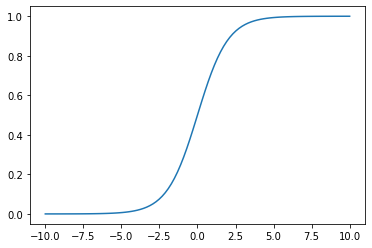

In [102]:
# funcion sigmoide
def sigmoid(p):
    return 1/(1 + np.exp(-p))

# mostramos la funcion
plt.plot(x, sigmoid(x))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

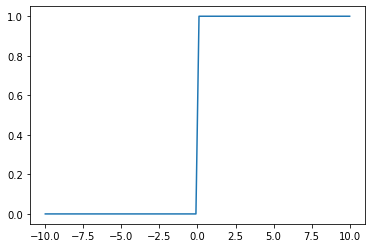

In [103]:
# funcion escalonada
def escalonada(p):
    return np.piecewise(p, [p<0.0, p>0.0], [0, 1])

# mostramos la funcion
plt.plot(x, escalonada(x))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

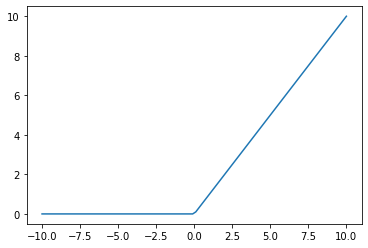

In [104]:
# funcion relu
def relu(p):
    return np.maximum(0, p)

# mostramos la funcion
plt.plot(x, relu(x))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

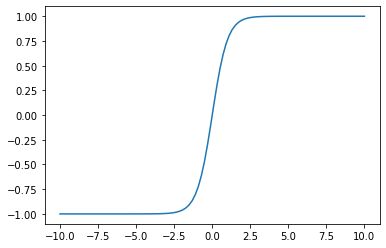

In [105]:
# funcion tanh
# ya está en numpy
plt.plot(x, np.tanh(x))
plt.show

Ahora crearemos las funciones de pérdida

In [106]:
# Ejemplo para comprobar
informado = np.array([0, 0, 1, 1]) 
prediccion = np.array([0.9, 0.5, 0.2, 0.0])

In [107]:
#Funcion de pérdida MSE (Mean Square Error)
def MSE(y, y_hat):
    return np.mean((y_hat-y)**2)
MSE(informado, prediccion)

0.675

CREAMOS LA RED NEURONAL

In [108]:
# sirve para crear el dataset con el que trabajaremos 
from sklearn.datasets import make_gaussian_quantiles
import random

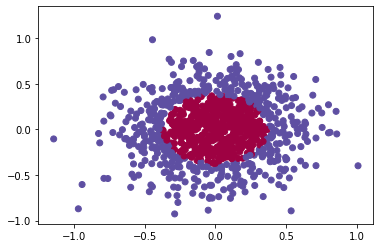

In [109]:
N = 1000
X, Y = make_gaussian_quantiles(
                        mean = None,
                        cov = 0.1,
                        n_samples = N, 
                        n_features = 2,
                        n_classes = 2,
                        shuffle = True,
                        random_state = None
)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap = plt.cm.Spectral)
plt.show()


In [110]:
# Tenemos que tener unos datos con los cuales comenzar, debemos tener unos pesos y unos bias, así que vamos a crearlos de forma aleatoria
def crear_parametros_aleatoriamente(dimensiones_capas):
    parametros = {}
    L = len(dimensiones_capas)
    for i in range(0, L-1): # le ponemos un -1 porque la última capa es una capa de salida, y no necesita pesos ni bias
        parametros['W'+str(i+1)] = np.random.rand(dimensiones_capas[i], dimensiones_capas[i+1])*2 -1 # creo los valores de los pesos de cada capa
        parametros['b'+str(i+1)] = np.random.rand(1, dimensiones_capas[i+1])*2 -1 # creo los valores de los bias
    return parametros

In [111]:
capas = [2, 4, 8, 1]
parametros = crear_parametros_aleatoriamente(capas)
parametros

{'W1': array([[ 4.37264270e-01,  7.50960480e-01,  3.94470635e-04,
          6.48917936e-02],
        [ 8.48853604e-01, -1.11210681e-01, -9.22008806e-01,
         -9.46825565e-01]]),
 'b1': array([[ 0.21342646, -0.16330142, -0.89714362, -0.47696749]]),
 'W2': array([[ 0.21578716, -0.88678901, -0.72055609, -0.97421276, -0.43463704,
          0.5353315 ,  0.00309026,  0.70385736],
        [ 0.0200519 , -0.99144668, -0.30228406,  0.40957347,  0.62949116,
         -0.67009681,  0.80280941, -0.88926576],
        [ 0.35334227, -0.80934203, -0.58477973, -0.13106113, -0.28145393,
         -0.84653178,  0.4815961 , -0.89228973],
        [ 0.84922296,  0.49743854, -0.742207  , -0.24220988,  0.00536909,
          0.39328672,  0.94339653, -0.29395253]]),
 'b2': array([[ 0.26521905,  0.64970682, -0.03152131, -0.36961857,  0.5888045 ,
         -0.39704969,  0.62610231, -0.82254185]]),
 'W3': array([[-0.81081605],
        [-0.04431719],
        [ 0.99528825],
        [ 0.60231217],
        [ 0.8966641

In [112]:
# con todos estos datos ya podemos avanzar por las capas (propagación forward) realizando el producto punto
resultado1 = relu(X@parametros['W1'] + parametros['b1'])
resultado2 = relu(resultado1@parametros['W2'] + parametros['b2'])
output = sigmoid(resultado2@parametros['W3'] + parametros['b3'])
output

array([[0.64243556],
       [0.59731457],
       [0.62964407],
       [0.65111887],
       [0.61352164],
       [0.63312752],
       [0.61257672],
       [0.64477553],
       [0.65111887],
       [0.60589279],
       [0.6296089 ],
       [0.61037895],
       [0.67352571],
       [0.60338146],
       [0.60600069],
       [0.65111887],
       [0.60597493],
       [0.62425693],
       [0.63225045],
       [0.63855935],
       [0.56427098],
       [0.62077023],
       [0.60083448],
       [0.65111887],
       [0.63766142],
       [0.63405594],
       [0.59043779],
       [0.64635736],
       [0.61418852],
       [0.65782287],
       [0.57895493],
       [0.65111887],
       [0.61781629],
       [0.62184539],
       [0.62279529],
       [0.62804552],
       [0.65144943],
       [0.64997381],
       [0.65111887],
       [0.61354434],
       [0.64823181],
       [0.65111887],
       [0.62601435],
       [0.61557563],
       [0.58758667],
       [0.65111887],
       [0.55494246],
       [0.570